In [1]:
import os
from urllib.request import urlretrieve

def download_dataset():

    urls = [
        ("1Da5OQ_EAc0pItQAepAjQxtqluXKjE2et",
        "movies_encoded_budget_filtered.csv"),
    ]

    for (fileId, filename) in urls:
        urlretrieve(f"https://drive.usercontent.google.com/download?id={fileId}&export=download&authuser=1&confirm=t", f"./{filename}")

download_dataset()

In [2]:
import pandas as pd
#movies_weighted = pd.read_csv("nocoeficient.csv")
movies_one_hot_encoded = pd.read_csv("movies_encoded_budget_filtered.csv")

movies_one_hot_encoded.drop(["Unnamed: 0", "Weighted_Rating", "revenue_adjusted"], axis=1, inplace=True)
movies_one_hot_encoded.set_index('title', inplace=True)
print(movies_one_hot_encoded.shape)
movies_one_hot_encoded.head()


(6497, 143)


,year,runtime,gross_adjusted,budget_adjusted,genre_action,genre_adult,genre_adventure,genre_animation,genre_biography,genre_comedy,...,producer_TSG Entertainment,producer_Touchstone Pictures,producer_Universal Pictures,producer_Village Roadshow,producer_Warner Bros,producer_di Bonaventura Pictures,season_Fall,season_Spring,season_Summer,season_Winter
title,,,,,,,,,,,,,,,,,,,,,
Say It Isn't So,2001,95,9.491541e+06,4.301270e+07,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
Killers,2010,100,6.575955e+07,1.048017e+08,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
The Pope of Greenwich Village,1984,121,1.800615e+07,2.346117e+07,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
House at the End of the Street,2012,101,4.195325e+07,9.157224e+06,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
The Man from Snowy River,1982,104,6.523282e+07,1.105137e+07,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Identify genre one-hot encoded features
genre_columns = list()
for column in movies_one_hot_encoded.columns:
  if "genre_" in column:
    genre_columns.append(column)

genres = movies_one_hot_encoded[genre_columns]

In [4]:
# Identify country one-hot encoded features
country_columns = list()
for column in movies_one_hot_encoded.columns:
  if "country_" in column:
    country_columns.append(column)

countries = movies_one_hot_encoded[country_columns]

In [5]:
# Identify director one-hot encoded features
director_columns = list()
for column in movies_one_hot_encoded.columns:
  if "director_" in column:
    director_columns.append(column)

directors = movies_one_hot_encoded[director_columns]

In [6]:
# Identify star (actors) one-hot encoded features
star_columns = list()
for column in movies_one_hot_encoded.columns:
  if "star_" in column:
    star_columns.append(column)

stars = movies_one_hot_encoded[star_columns]

In [7]:
# Identify producer (production company) one-hot encoded features
producer_columns = list()
for column in movies_one_hot_encoded.columns:
  if "producer_" in column:
    producer_columns.append(column)

producers = movies_one_hot_encoded[producer_columns]

In [8]:
# Identify season one-hot encoded features
season_columns = list()
for column in movies_one_hot_encoded.columns:
  if "season_" in column:
    season_columns.append(column)

seasons = movies_one_hot_encoded[season_columns]

# Auto encoding

In [9]:
movies_df = movies_one_hot_encoded.copy()
columns_to_drop = list()
columns_to_drop += genre_columns[:]
columns_to_drop += country_columns[:]
columns_to_drop += director_columns[:]
columns_to_drop += star_columns[:]
columns_to_drop += producer_columns[:]
columns_to_drop += season_columns[:]

movies_df.drop(columns_to_drop, inplace=True, axis=1)
movies_df.head(10)

,year,runtime,gross_adjusted,budget_adjusted
title,,,,
Say It Isn't So,2001,95,9.491541e+06,4.301270e+07
Killers,2010,100,6.575955e+07,1.048017e+08
The Pope of Greenwich Village,1984,121,1.800615e+07,2.346117e+07
House at the End of the Street,2012,101,4.195325e+07,9.157224e+06
The Man from Snowy River,1982,104,6.523282e+07,1.105137e+07
Skiptrace,2016,107,2.275042e+03,4.062575e+07
Beverly Hills Cop III,1994,105,8.760697e+07,1.028009e+08
Bad Boys II,2003,147,2.295341e+08,2.152786e+08
A Single Man,2009,97,1.301949e+07,9.941940e+06


In [11]:
%pip install tensorflow

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
import tensorflow as tf

import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Dense, Lambda, Embedding, Dropout

from keras.utils import plot_model


## Genre encoding

### Find best parameters for genre autoencoder

In [13]:
# Define dimensions
input_dim = genres.shape[1]

losses = []
accuracies = []
for i in range(1,input_dim):
  print(f'Encoding dimension {i}')
  encoding_dim = i
  # Split into training and test sets
  genres_train, genres_test = train_test_split(genres, test_size=0.25)

  # Define autoencoder architecture
  genre_autoencoder = Sequential([
      Input(shape=(input_dim,)),
      Dropout(0.6),
      Dense(encoding_dim, activation='relu', activity_regularizer=l1_l2(l1=0.01, l2=0.01), name='codes'),
      Dense(input_dim, activation='sigmoid')
    ]
  )
  # Compile and train the model
  genre_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  genre_autoencoder.fit(genres_train, genres_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

  # Test the model
  genre_autoencoder.evaluate(genres_test, genres_test)
  test_loss, test_accuracy = genre_autoencoder.evaluate(genres_test, genres_test)
  losses.append(test_loss)
  accuracies.append(test_accuracy)



Encoding dimension 1
Epoch 1/100
122/122 [==============================] - 4s 5ms/step - loss: 0.6727 - accuracy: 0.1478 - val_loss: 0.6526 - val_accuracy: 0.1621
Epoch 2/100
122/122 [==============================] - 0s 3ms/step - loss: 0.6299 - accuracy: 0.1475 - val_loss: 0.6107 - val_accuracy: 0.1621
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.1475 - val_loss: 0.5450 - val_accuracy: 0.1621
Epoch 4/100
122/122 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.1475 - val_loss: 0.4773 - val_accuracy: 0.1621
Epoch 5/100
122/122 [==============================] - 0s 4ms/step - loss: 0.4692 - accuracy: 0.1475 - val_loss: 0.4403 - val_accuracy: 0.1621
Epoch 6/100
122/122 [==============================] - 0s 3ms/step - loss: 0.4371 - accuracy: 0.1475 - val_loss: 0.4212 - val_accuracy: 0.1621
Epoch 7/100
122/122 [==============================] - 0s 3ms/step - loss: 0.4193 - accuracy: 0.1475 - val_loss: 0.4097 -

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot as plt

print(f'Minimum loss {min(losses)}, in index {losses.index(min(losses))}')
print(f'Maximum accuracy {max(accuracies)}, in index {accuracies.index(max(accuracies))}')

plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.axvline(x=losses.index(min(losses)), color='blue', linestyle='--')
plt.axvline(x=accuracies.index(max(accuracies)), color='orange', linestyle='--')
plt.axvline(x=8, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

# By visualization we choose to reduce to 8 dimensions to train the model encoder

### Train Genre autoencoder with best parameters

In [11]:
input_dim = genres.shape[1]
encoding_dim = 8

# Split into training and test sets
genres_train, genres_test = train_test_split(genres, test_size=0.25)

# Define autoencoder architecture
genre_autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dropout(0.6),
    Dense(encoding_dim, activation='relu', activity_regularizer=l1_l2(l1=0.01, l2=0.01), name='codes'),
    Dense(input_dim, activation='sigmoid')
  ]
)
# Compile and train the model
genre_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
genre_autoencoder.fit(genres_train, genres_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

# Test the model
genre_autoencoder.evaluate(genres_test, genres_test)
test_loss, test_accuracy = genre_autoencoder.evaluate(genres_test, genres_test)

print(f'Test loss: {test_loss} \nTest accuracy: {test_accuracy}')

Epoch 1/100
122/122 [==============================] - 4s 5ms/step - loss: 0.6668 - accuracy: 0.1432 - val_loss: 0.6064 - val_accuracy: 0.1456
Epoch 2/100
122/122 [==============================] - 0s 3ms/step - loss: 0.5706 - accuracy: 0.1881 - val_loss: 0.5098 - val_accuracy: 0.1641
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.2184 - val_loss: 0.4398 - val_accuracy: 0.1754
Epoch 4/100
122/122 [==============================] - 0s 3ms/step - loss: 0.4421 - accuracy: 0.2481 - val_loss: 0.3968 - val_accuracy: 0.2041
Epoch 5/100
122/122 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.2923 - val_loss: 0.3704 - val_accuracy: 0.2123
Epoch 6/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.3187 - val_loss: 0.3522 - val_accuracy: 0.2287
Epoch 7/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3707 - accuracy: 0.2961 - val_loss: 0.3386 - val_accuracy: 0.2328

In [12]:
# Generate encoding
genre_encoder = Model(inputs=genre_autoencoder.input, outputs=genre_autoencoder.get_layer('codes').output)
genres_encoded = genre_encoder.predict(genres)

204/204 [==============================] - 0s 1ms/step


In [13]:
movies_df['genre_encoded'] = list(genres_encoded)
genres_encoded_df = movies_df['genre_encoded'].apply(pd.Series).add_prefix('genre_encoded_')
movies_df = pd.concat([movies_df.drop('genre_encoded', axis=1),
                       movies_df['genre_encoded'].apply(pd.Series).add_prefix('genre_encoded_')],
                      axis=1)

## Country encoding

### Find best parameters for country autoencoder

In [14]:
# Define dimensions
input_dim = countries.shape[1]

losses = []
accuracies = []
for i in range(1,input_dim):
  print(f'Encoding dimension {i}')
  encoding_dim = i
  # Split into training and test sets
  countries_train, countries_test = train_test_split(countries, test_size=0.25)

  # Define autoencoder architecture
  country_autoencoder = Sequential([
      Input(shape=(input_dim,)),
      Dropout(0.6),
      Dense(encoding_dim, activation='relu', activity_regularizer=l1_l2(l1=0.01, l2=0.01), name='codes'),
      Dense(input_dim, activation='sigmoid')
    ]
  )
  # Compile and train the model
  country_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  country_autoencoder.fit(countries_train, countries_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

  # Test the model
  country_autoencoder.evaluate(countries_test, countries_test)
  test_loss, test_accuracy = country_autoencoder.evaluate(countries_test, countries_test)
  losses.append(test_loss)
  accuracies.append(test_accuracy)



Encoding dimension 1
Epoch 1/100
122/122 [==============================] - 1s 5ms/step - loss: 0.6615 - accuracy: 0.6282 - val_loss: 0.6236 - val_accuracy: 0.6390
Epoch 2/100
122/122 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.6382 - val_loss: 0.5441 - val_accuracy: 0.6390
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.5139 - accuracy: 0.6382 - val_loss: 0.4554 - val_accuracy: 0.6390
Epoch 4/100
122/122 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.6382 - val_loss: 0.3796 - val_accuracy: 0.6390
Epoch 5/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3760 - accuracy: 0.6382 - val_loss: 0.3235 - val_accuracy: 0.6390
Epoch 6/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.6382 - val_loss: 0.2847 - val_accuracy: 0.6390
Epoch 7/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.6382 - val_loss: 0.2563 -

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot as plt

print(f'Minimum loss {min(losses)}, in index {losses.index(min(losses))}')
print(f'Maximum accuracy {max(accuracies)}, in index {accuracies.index(max(accuracies))}')

plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.axvline(x=losses.index(min(losses)), color='blue', linestyle='--')
plt.axvline(x=accuracies.index(max(accuracies)), color='orange', linestyle='--')
plt.axvline(x=8, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

# By visualization we choose to reduce to 5 dimensions to train the model encoder

### Train Country autoencoder with best parameters

In [14]:
input_dim = countries.shape[1]
encoding_dim = 8

# Split into training and test sets
countries_train, countries_test = train_test_split(countries, test_size=0.25)

# Define autoencoder architecture
country_autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dropout(0.6),
    Dense(encoding_dim, activation='relu', activity_regularizer=l1_l2(l1=0.01, l2=0.01), name='codes'),
    Dense(input_dim, activation='sigmoid')
  ]
)
# Compile and train the model
country_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
country_autoencoder.fit(countries_train, countries_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

# Test the model
country_autoencoder.evaluate(countries_test, countries_test)
test_loss, test_accuracy = country_autoencoder.evaluate(countries_test, countries_test)

print(f'Test loss: {test_loss} \nTest accuracy: {test_accuracy}')

122/122 [==============================] - 2s 5ms/step - loss: 0.6650 - accuracy: 0.6236 - val_loss: 0.6154 - val_accuracy: 0.6821
Epoch 2/100
122/122 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.6259 - val_loss: 0.4976 - val_accuracy: 0.6872
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.6351 - val_loss: 0.3586 - val_accuracy: 0.6872
Epoch 4/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.6402 - val_loss: 0.2710 - val_accuracy: 0.6821
Epoch 5/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2596 - accuracy: 0.6346 - val_loss: 0.2248 - val_accuracy: 0.6821
Epoch 6/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2325 - accuracy: 0.6582 - val_loss: 0.2055 - val_accuracy: 0.6821
Epoch 7/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2178 - accuracy: 0.6549 - val_loss: 0.1938 - val_accuracy: 0.6821
Epoch 8/100

In [15]:
# Generate encoding
country_encoder = Model(inputs=country_autoencoder.input, outputs=country_autoencoder.get_layer('codes').output)
countries_encoded = country_encoder.predict(countries)

204/204 [==============================] - 0s 1ms/step


In [16]:
movies_df['country_encoded'] = list(countries_encoded)
movies_df = pd.concat([movies_df.drop('country_encoded', axis=1),
                       movies_df['country_encoded'].apply(pd.Series).add_prefix('country_encoded_')],
                      axis=1)

## Director encoding

### Find best parameters for director autoencoder

In [ ]:
# Define dimensions
input_dim = directors.shape[1]

losses = []
accuracies = []
for i in range(1,input_dim):
  print(f'Encoding dimension {i}')
  encoding_dim = i
  # Split into training and test sets
  directors_train, directors_test = train_test_split(directors, test_size=0.25)

  # Define autoencoder architecture
  director_autoencoder = Sequential([
      Input(shape=(input_dim,)),
      Dropout(0.6),
      Dense(encoding_dim, activation='relu', activity_regularizer=l1_l2(l1=0.01, l2=0.01), name='codes'),
      Dense(input_dim, activation='sigmoid')
    ]
  )
  # Compile and train the model
  director_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  director_autoencoder.fit(directors_train, directors_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

  # Test the model
  director_autoencoder.evaluate(directors_test, directors_test)
  test_loss, test_accuracy = director_autoencoder.evaluate(directors_test, directors_test)
  losses.append(test_loss)
  accuracies.append(test_accuracy)



In [ ]:
from matplotlib import pyplot as plt

print(f'Minimum loss {min(losses)}, in index {losses.index(min(losses))}')
print(f'Maximum accuracy {max(accuracies)}, in index {accuracies.index(max(accuracies))}')

plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.axvline(x=losses.index(min(losses)), color='blue', linestyle='--')
plt.axvline(x=accuracies.index(max(accuracies)), color='orange', linestyle='--')
plt.axvline(x=8, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

# By visualization we choose to reduce to 8 dimensions to train the model encoder

### Train Director autoencoder with best parameters

In [17]:
input_dim = directors.shape[1]
encoding_dim = 8

# Split into training and test sets
directors_train, directors_test = train_test_split(directors, test_size=0.25)

# Define autoencoder architecture
director_autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dropout(0.6),
    Dense(encoding_dim, activation='relu', activity_regularizer=l1_l2(l1=0.01, l2=0.01), name='codes'),
    Dense(input_dim, activation='sigmoid')
  ]
)
# Compile and train the model
director_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
director_autoencoder.fit(directors_train, directors_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

# Test the model
director_autoencoder.evaluate(directors_test, directors_test)
test_loss, test_accuracy = director_autoencoder.evaluate(directors_test, directors_test)

print(f'Test loss: {test_loss} \nTest accuracy: {test_accuracy}')

Epoch 1/100
122/122 [==============================] - 2s 5ms/step - loss: 0.6664 - accuracy: 0.5807 - val_loss: 0.5663 - val_accuracy: 0.9713
Epoch 2/100
122/122 [==============================] - 0s 3ms/step - loss: 0.5084 - accuracy: 0.8450 - val_loss: 0.3937 - val_accuracy: 0.9713
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3767 - accuracy: 0.9651 - val_loss: 0.2772 - val_accuracy: 0.9713
Epoch 4/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.9651 - val_loss: 0.2125 - val_accuracy: 0.9713
Epoch 5/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2200 - accuracy: 0.9651 - val_loss: 0.1733 - val_accuracy: 0.9713
Epoch 6/100
122/122 [==============================] - 0s 3ms/step - loss: 0.1781 - accuracy: 0.9651 - val_loss: 0.1479 - val_accuracy: 0.9713
Epoch 7/100
122/122 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9651 - val_loss: 0.1312 - val_accuracy: 0.9713

In [18]:
# Generate encoding
director_encoder = Model(inputs=director_autoencoder.input, outputs=director_autoencoder.get_layer('codes').output)
directors_encoded = director_encoder.predict(directors)

204/204 [==============================] - 0s 1ms/step


In [19]:
movies_df['director_encoded'] = list(directors_encoded)
movies_df = pd.concat([movies_df.drop('director_encoded', axis=1),
                       movies_df['director_encoded'].apply(pd.Series).add_prefix('director_encoded_')],
                      axis=1)

## Star encoding

### Find best parameters for star autoencoder

In [ ]:
# Define dimensions
input_dim = stars.shape[1]

losses = []
accuracies = []
for i in range(1,input_dim):
  print(f'Encoding dimension {i}')
  encoding_dim = i
  # Split into training and test sets
  stars_train, stars_test = train_test_split(stars, test_size=0.25)

  # Define autoencoder architecture
  star_autoencoder = Sequential([
      Input(shape=(input_dim,)),
      Dropout(0.6),
      Dense(encoding_dim, activation='relu', activity_regularizer=l1_l2(l1=0.01, l2=0.01), name='codes'),
      Dense(input_dim, activation='sigmoid')
    ]
  )
  # Compile and train the model
  star_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  star_autoencoder.fit(stars_train, stars_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

  # Test the model
  star_autoencoder.evaluate(stars_test, stars_test)
  test_loss, test_accuracy = star_autoencoder.evaluate(stars_test, stars_test)
  losses.append(test_loss)
  accuracies.append(test_accuracy)



In [ ]:
from matplotlib import pyplot as plt

print(f'Minimum loss {min(losses)}, in index {losses.index(min(losses))}')
print(f'Maximum accuracy {max(accuracies)}, in index {accuracies.index(max(accuracies))}')

plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.axvline(x=losses.index(min(losses)), color='blue', linestyle='--')
plt.axvline(x=accuracies.index(max(accuracies)), color='orange', linestyle='--')
plt.axvline(x=8, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

# By visualization we choose to reduce to 30 dimensions to train the model encoder

### Train Star autoencoder with best parameters

In [20]:
input_dim = stars.shape[1]
encoding_dim = 30

# Split into training and test sets
stars_train, stars_test = train_test_split(stars, test_size=0.25)

# Define autoencoder architecture
star_autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dropout(0.6),
    Dense(encoding_dim, activation='relu', activity_regularizer=l1_l2(l1=0.01, l2=0.01), name='codes'),
    Dense(input_dim, activation='sigmoid')
  ]
)
# Compile and train the model
star_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
star_autoencoder.fit(stars_train, stars_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

# Test the model
star_autoencoder.evaluate(stars_test, stars_test)
test_loss, test_accuracy = star_autoencoder.evaluate(stars_test, stars_test)

print(f'Test loss: {test_loss} \nTest accuracy: {test_accuracy}')

122/122 [==============================] - 2s 5ms/step - loss: 0.6359 - accuracy: 0.6664 - val_loss: 0.5101 - val_accuracy: 0.8287
Epoch 2/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3860 - accuracy: 0.8486 - val_loss: 0.2560 - val_accuracy: 0.8287
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.8486 - val_loss: 0.1811 - val_accuracy: 0.8287
Epoch 4/100
122/122 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.8486 - val_loss: 0.1543 - val_accuracy: 0.8287
Epoch 5/100
122/122 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.8486 - val_loss: 0.1391 - val_accuracy: 0.8287
Epoch 6/100
122/122 [==============================] - 0s 3ms/step - loss: 0.1332 - accuracy: 0.8486 - val_loss: 0.1281 - val_accuracy: 0.8287
Epoch 7/100
122/122 [==============================] - 0s 3ms/step - loss: 0.1234 - accuracy: 0.8486 - val_loss: 0.1192 - val_accuracy: 0.8287
Epoch 8/100

In [21]:
# Generate encoding
star_encoder = Model(inputs=star_autoencoder.input, outputs=star_autoencoder.get_layer('codes').output)
stars_encoded = star_encoder.predict(stars)

204/204 [==============================] - 0s 1ms/step


In [22]:
movies_df['star_encoded'] = list(stars_encoded)
movies_df = pd.concat([movies_df.drop('star_encoded', axis=1),
                       movies_df['star_encoded'].apply(pd.Series).add_prefix('star_encoded_')],
                      axis=1)

## Producer encoding

### Find best parameters for producer autoencoder

In [ ]:
# Define dimensions
input_dim = producers.shape[1]

losses = []
accuracies = []
for i in range(1,input_dim):
  print(f'Encoding dimension {i}')
  encoding_dim = i
  # Split into training and test sets
  producers_train, producers_test = train_test_split(producers, test_size=0.25)

  # Define autoencoder architecture
  producer_autoencoder = Sequential([
      Input(shape=(input_dim,)),
      Dropout(0.6),
      Dense(encoding_dim, activation='relu', activity_regularizer=l1_l2(l1=0.01, l2=0.01), name='codes'),
      Dense(input_dim, activation='sigmoid')
    ]
  )
  # Compile and train the model
  producer_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=10)
  producer_autoencoder.fit(producers_train, producers_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

  # Test the model
  producer_autoencoder.evaluate(producers_test, producers_test)
  test_loss, test_accuracy = producer_autoencoder.evaluate(producers_test, producers_test)
  losses.append(test_loss)
  accuracies.append(test_accuracy)



In [ ]:
from matplotlib import pyplot as plt

print(f'Minimum loss {min(losses)}, in index {losses.index(min(losses))}')
print(f'Maximum accuracy {max(accuracies)}, in index {accuracies.index(max(accuracies))}')

plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.axvline(x=losses.index(min(losses)), color='blue', linestyle='--')
plt.axvline(x=accuracies.index(max(accuracies)), color='orange', linestyle='--')
plt.axvline(x=8, color='gray', linestyle='--')
plt.grid(True)
plt.legend()
plt.show()

# By visualization we choose to reduce to 10 dimensions to train the model encoder

### Train Producer autoencoder with best parameters

In [23]:
input_dim = producers.shape[1]
encoding_dim = 10

# Split into training and test sets
producers_train, producers_test = train_test_split(producers, test_size=0.25)

# Define autoencoder architecture
producer_autoencoder = Sequential([
    Input(shape=(input_dim,)),
    Dropout(0.6),
    Dense(encoding_dim, activation='relu', activity_regularizer=l1_l2(l1=0.01, l2=0.01), name='codes'),
    Dense(input_dim, activation='sigmoid')
  ]
)
# Compile and train the model
producer_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
producer_autoencoder.fit(producers_train, producers_train, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])

# Test the model
producer_autoencoder.evaluate(producers_test, producers_test)
test_loss, test_accuracy = producer_autoencoder.evaluate(producers_test, producers_test)

print(f'Test loss: {test_loss} \nTest accuracy: {test_accuracy}')

Epoch 1/100
122/122 [==============================] - 2s 5ms/step - loss: 0.6621 - accuracy: 0.2623 - val_loss: 0.6032 - val_accuracy: 0.0051
Epoch 2/100
122/122 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.3228 - val_loss: 0.4374 - val_accuracy: 0.4513
Epoch 3/100
122/122 [==============================] - 0s 3ms/step - loss: 0.3781 - accuracy: 0.4509 - val_loss: 0.2998 - val_accuracy: 0.4492
Epoch 4/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2797 - accuracy: 0.4501 - val_loss: 0.2411 - val_accuracy: 0.4492
Epoch 5/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.4524 - val_loss: 0.2153 - val_accuracy: 0.4492
Epoch 6/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2145 - accuracy: 0.4729 - val_loss: 0.2003 - val_accuracy: 0.4492
Epoch 7/100
122/122 [==============================] - 0s 3ms/step - loss: 0.2020 - accuracy: 0.4922 - val_loss: 0.1897 - val_accuracy: 0.4492

In [24]:
# Generate encoding
producer_encoder = Model(inputs=producer_autoencoder.input, outputs=producer_autoencoder.get_layer('codes').output)
producers_encoded = producer_encoder.predict(producers)

204/204 [==============================] - 0s 1ms/step


In [25]:
movies_df['producer_encoded'] = list(producers_encoded)
movies_df = pd.concat([movies_df.drop('producer_encoded', axis=1),
                       movies_df['producer_encoded'].apply(pd.Series).add_prefix('producer_encoded_')],
                      axis=1)

## Season encoding

In [26]:
def encode_seasons(row):
    if row['season_Spring'] == 1:
        return 2
    elif row['season_Summer'] == 1:
        return 3
    elif row['season_Fall'] == 1:
        return 4
    elif row['season_Winter'] == 1:
        return 1
    return 0  # In case no season identified

movies_df['season_encoded'] = seasons.apply(encode_seasons, axis=1)


In [27]:
movies_df.shape

(6497, 69)

# Prediction model: Neural network

## Prepare Data

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Suponiendo que `movies_one_hot_encoded` es tu DataFrame
df = movies_df
X = df.drop('gross_adjusted', axis=1)
y = df['gross_adjusted']


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale continous data from the features
scaler_X = StandardScaler()
continuous_features = ['year', 'runtime', 'budget_adjusted']
scaler_X.fit(X_train[continuous_features])

# Transformar los datos continuos
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_features] = scaler_X.transform(X_train[continuous_features])
X_test_scaled[continuous_features] = scaler_X.transform(X_test[continuous_features])

# Scale target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


In [29]:
# Seleccionar solo las características resultantes para el entrenamiento
X_train_nn = X_train_scaled
X_test_nn = X_test_scaled

## Train Neural Network

In [87]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD


# Crear el modelo
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_nn.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.0001))


model.fit(X_train_nn, y_train_scaled, epochs=100, batch_size=40, verbose=1)
y_pred_nn = model.predict(X_test_nn)

# Evaluar el modelo
print("Final MSE:", mean_squared_error(y_test_scaled, y_pred_nn))

Epoch 1/100
130/130 [==============================] - 1s 2ms/step - loss: 0.4270
Epoch 2/100
130/130 [==============================] - 0s 2ms/step - loss: 0.3600
Epoch 3/100
130/130 [==============================] - 0s 2ms/step - loss: 0.3478
Epoch 4/100
130/130 [==============================] - 0s 2ms/step - loss: 0.3433
Epoch 5/100
130/130 [==============================] - 0s 2ms/step - loss: 0.3402
Epoch 6/100
130/130 [==============================] - 0s 2ms/step - loss: 0.3379
Epoch 7/100
130/130 [==============================] - 0s 3ms/step - loss: 0.3356
Epoch 8/100
130/130 [==============================] - 0s 2ms/step - loss: 0.3339
Epoch 9/100
130/130 [==============================] - 0s 2ms/step - loss: 0.3323
Epoch 10/100
130/130 [==============================] - 0s 2ms/step - loss: 0.3309
Epoch 11/100
130/130 [==============================] - 0s 2ms/step - loss: 0.3293
Epoch 12/100
130/130 [==============================] - 0s 2ms/step - loss: 0.3279
Epoch 13/100


In [88]:
y_pred_original = scaler_y.inverse_transform(y_pred_nn)
y_test_original = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).flatten()

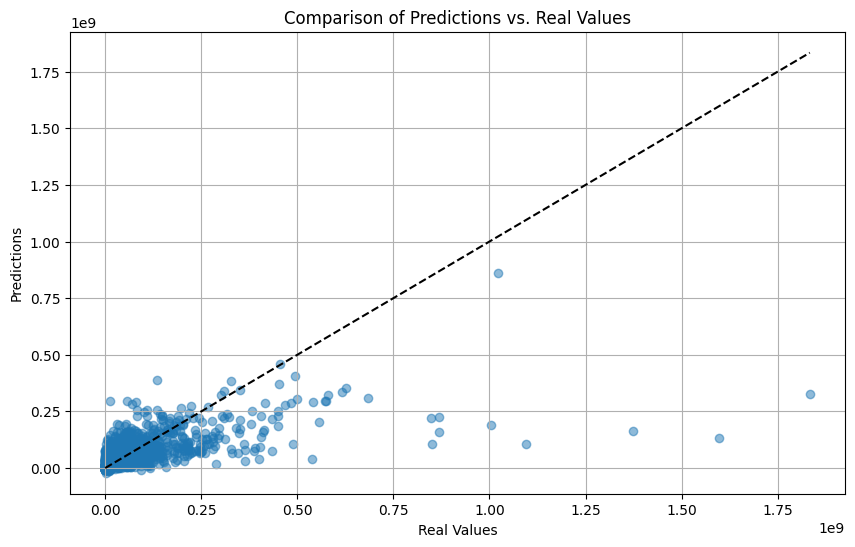

In [89]:
import matplotlib.pyplot as plt

#Create Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], 'k--')
plt.title('Comparison of Predictions vs. Real Values')
plt.xlabel('Real Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()



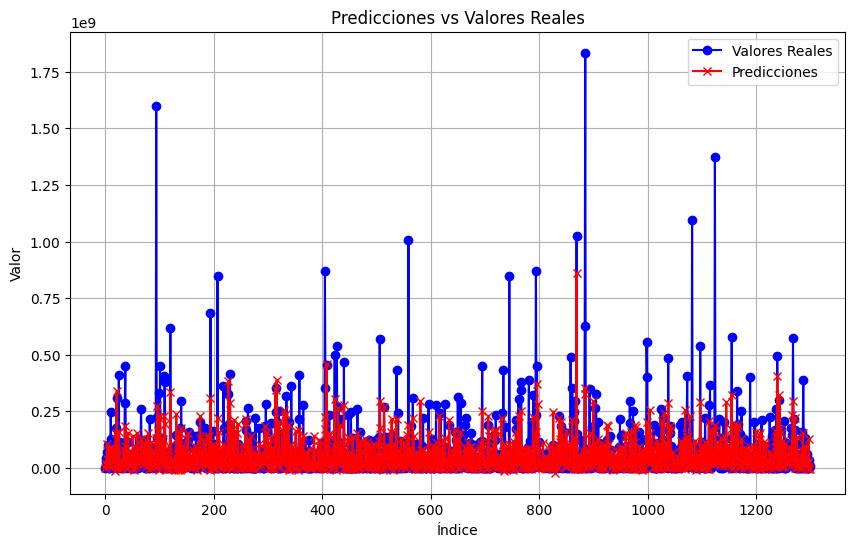

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Valores Reales', color='blue', marker='o')
plt.plot(y_pred_original, label='Predicciones', color='red', marker='x')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

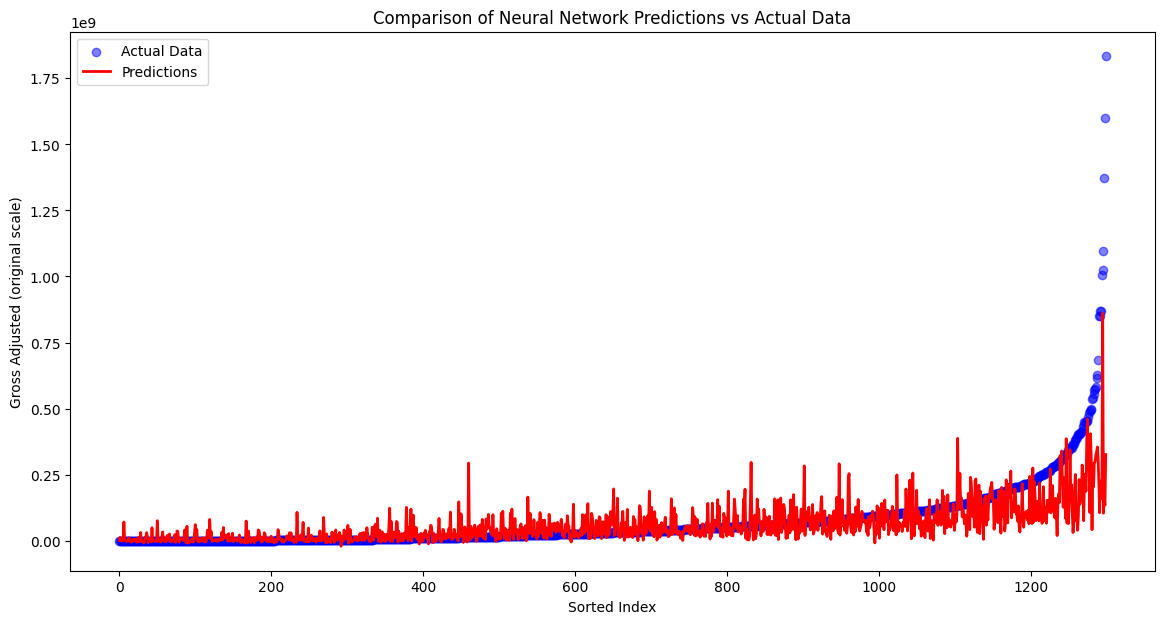

In [91]:

# Sort the values by y_test_original for a consistent display
order = np.argsort(y_test_original)
sorted_y_test = y_test_original[order]
sorted_y_pred = y_pred_original[order]

# Creating the chart
plt.figure(figsize=(14, 7))
plt.scatter(range(len(sorted_y_test)), sorted_y_test, color='blue', label='Actual Data', alpha=0.5)
plt.plot(range(len(sorted_y_pred)), sorted_y_pred, color='red', label='Predictions', linewidth=2)
plt.title('Comparison of Neural Network Predictions vs Actual Data')
plt.xlabel('Sorted Index')
plt.ylabel('Gross Adjusted (original scale)')
plt.legend()
plt.show()


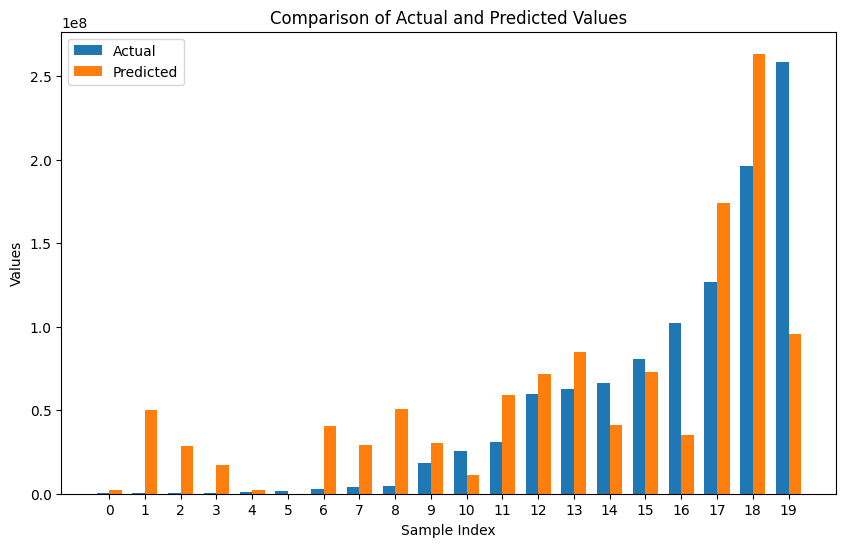

In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurando que el número de muestras no exceda el tamaño de y_test_original
num_samples = min(20, len(y_test_original))

# Selección de índices aleatorios sin repetición
indices = np.random.choice(len(y_test_original), num_samples, replace=False)

# Usando los índices para seleccionar valores de y_test_original y y_pred_original
sampled_y_test = y_test_original[indices]
sampled_y_pred = y_pred_original[indices]

# Ordenar por los valores reales para una visualización más clara
order = np.argsort(sampled_y_test)
sorted_sampled_y_test = sampled_y_test[order]
sorted_sampled_y_pred = sampled_y_pred[order]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(num_samples)

plt.bar(index, sorted_sampled_y_test, bar_width, label='Actual')
# Asegurándonos de que la suma se realiza correctamente
plt.bar(index + bar_width, sorted_sampled_y_pred[:,0], bar_width, label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Comparison of Actual and Predicted Values')
plt.xticks(index + bar_width / 2, [str(i) for i in range(num_samples)])
plt.legend()

plt.show()

In [93]:
sorted_sampled_y_pred[:,0].shape

(20,)